In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.x13 import x13_arima_select_order, x13_arima_analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX

x13path = "."

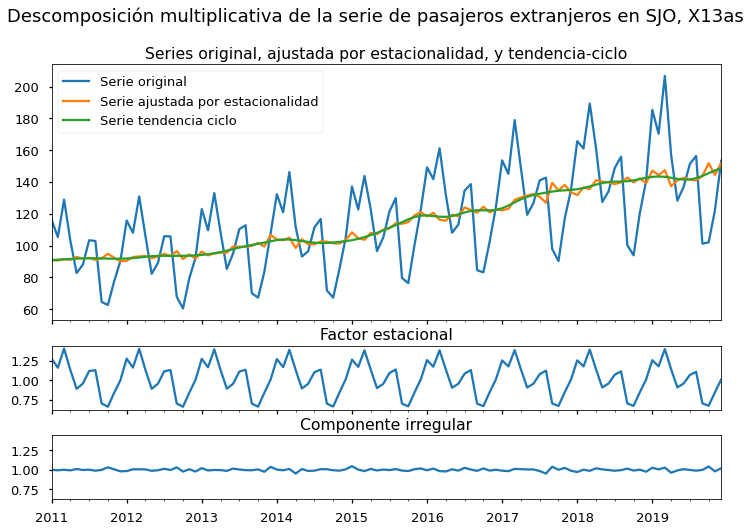

In [2]:
# read data from previous example
sjodatos =pd.read_pickle("datos/SJO-pasajeros.pickle")

extranjeros = pd.DataFrame(np.log(sjodatos['extranjeros'].values),
                      index=pd.period_range('2011-01', '2019-12', freq='M'))

def X13ARIMA(serie, show=False):

    res = x13_arima_analysis(serie, x12path=x13path, log=False)
    if show:
        print(res.results)
    temp = pd.concat([res.__getattribute__(componente) for componente in ['observed','seasadj','trend','irregular']], axis=1)
    temp.columns = ['Serie original','Serie ajustada por estacionalidad','Serie tendencia ciclo','Componente irregular']
    return temp

componentes = X13ARIMA(extranjeros, False)


fig = plt.figure(figsize=[12,8])
gs = plt.GridSpec(3,1,figure=fig, height_ratios=[4,1,1])
ax0 = fig.add_subplot(gs[0])
np.exp(componentes.iloc[:,:3]).plot(ax=ax0)

ax1 = fig.add_subplot(gs[1],sharex=ax0)
sfact = componentes['Serie original'] - componentes['Serie ajustada por estacionalidad']
np.exp(sfact).plot(ax=ax1)


ax2 = fig.add_subplot(gs[2],sharex=ax0, sharey=ax1)
np.exp(componentes['Componente irregular']).plot(ax=ax2)

ax0.set(title='Series original, ajustada por estacionalidad, y tendencia-ciclo')
ax1.set(title='Factor estacional')
ax2.set(title='Componente irregular')
fig.suptitle('Descomposición multiplicativa de la serie de pasajeros extranjeros en SJO, X13as', size=18);

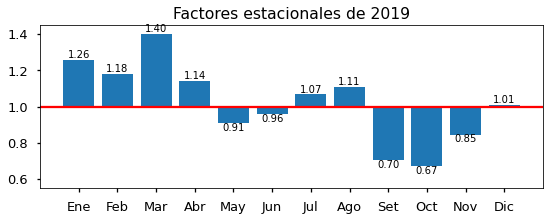

In [3]:
mesescorto = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
         'Jul', 'Ago', 'Set', 'Oct', 'Nov', 'Dic']


factores2019 = np.exp(sfact['2019':'2019'])
etiq = [f'{ff:.2f}' for ff in factores2019]
fig, ax = plt.subplots(figsize=[9,3])

ax.bar(mesescorto, factores2019-1)
ax.set(yticks=np.array([0.6,0.8,1.0,1.2,1.4])-1,
       yticklabels = ['0.6','0.8','1.0','1.2','1.4'],
       ylim=[-0.45,0.45])

ax.grid(False)
ax.axhline(0, color='red')

for mes, ff, tx in zip(range(12), factores2019.values, etiq):
    offs = -1.025 if ff<1 else -0.975
    ax.annotate(tx, (mes,ff+offs),ha='center', va='center')

ax.set(title='Factores estacionales de 2019');